# Workforce Optimization Tool -Notebook Demonstration
## UMEC/AHEC Utah/IBM
## Utah State Capitol Building, 31st October 2018

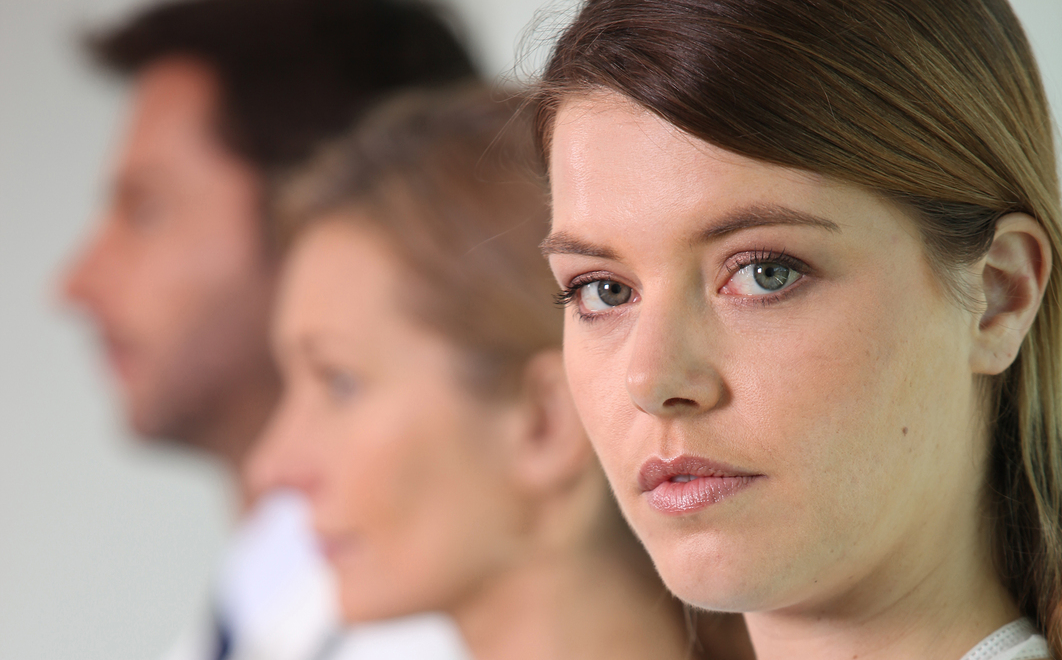

This demonstration executes the Input Data, Model and Optimization elements of the Tool.  The data has been loaded from an easy to use Excel spreadsheet via a model administration tool.  This data is then combined with some variables provided by the end user to conduct a number of 'what if' scenarios.  This web page is running the actual model - it is _not_ smoke and mirrors!

In line with US Federal recommendations, we have built the model using open source technologies (which includes the software running this demo!).  The technologies we have used are mainstream and free to use.  This should help UMEC maintain the tool.  The code below imports some of that open source technology, including the wonderfully named 'pandas' which stands for **pan**el **da**ta.  We use pandas to bring in and manipulate the data from the Excel spreadsheet.

The Model and the Optimizer are both written in Python which is the most popular language in the world today (according to the IEEE)

In [1]:
# these are all open source components we have re-used
import os
import pandas as pd
from pulp import *
import numpy as np
import sys
from numpy import dot
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
# we wrote these modules over the last three weeks!
import workforce_pandas as wfpd # a pandas representation of the Input Data
from allo_cal4 import main # the workforce optimizer itself

Next we set some defaults for the model to use in its scenarios and import each bit of the spreadsheet that was convered into pandas format by the administration too.

In [2]:
geo = 'State of Utah'; year = '2018' # default geo
sut_target = 0.8 # default target
collapse_group = False
FTE_time = 60*2080 # default FTE mins per annum

In [3]:
pop_chronic_trend = wfpd.dataframes['pop_chronic_trend']
pop_chronic_prev = wfpd.dataframes['pop_chronic_prev']
pop_chronic_trend = wfpd.dataframes['pop_chronic_trend']
chron_care_freq = wfpd.dataframes['chron_care_freq']
geo_area = wfpd.dataframes['geo_area_list']
service_characteristics = wfpd.dataframes['service_characteristics']
pop_acute_need = wfpd.dataframes['pop_acute_need']
population = wfpd.dataframes['population']
provider_supply = wfpd.dataframes['provider_supply']
pop_prev_need = wfpd.dataframes['pop_prev_need']
provider_list = wfpd.dataframes['provider_list']
encounter_detail = wfpd.dataframes['encounter_detail']
overhead_work = wfpd.dataframes['overhead_work']
sdoh_score = geo_area.loc[geo_area['geo_area'] == geo,'sdoh_index']

# Scenario 1 - Optimal workforce optimization

This is very much where we started.  Looking at the whole state and a calculated Clinical Need, we can allocate work to different provider types by offsetting both **suitability** and **wage**.  Of course the model is not constrained by history, so the answers it comes up with might be ideal for a greenfield primary care environment, but perhaps less appropriate for a well-established and mature system.

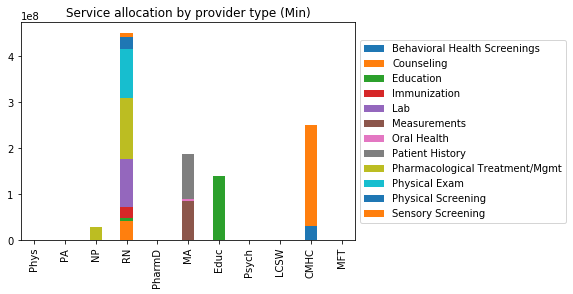

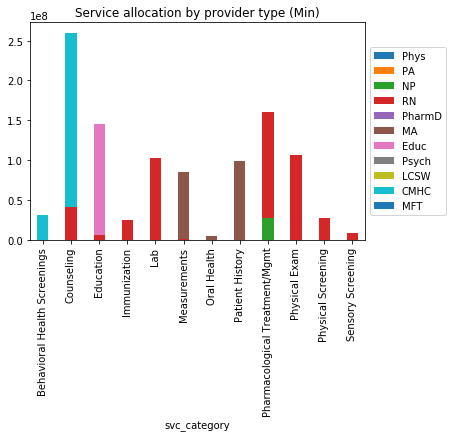

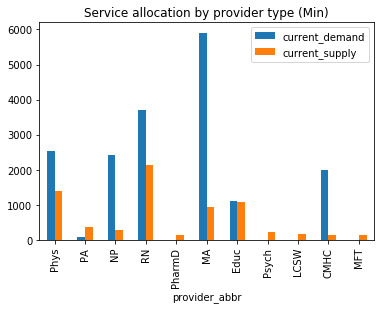

{'total_wage': 1264833607.0, 'total_sutab': 0.37, 'ind_wage': provider_abbr
 Phys      451568425.0
 PA          8930805.0
 NP        232113492.0
 RN        213274285.0
 PharmD            0.0
 MA        191928750.0
 Educ       61912850.0
 Psych             0.0
 LCSW              0.0
 CMHC      105105000.0
 MFT               0.0
 dtype: float64, 'ind_sutab': provider_abbr
 Phys       NaN
 PA         NaN
 NP        0.38
 RN        0.38
 PharmD     NaN
 MA        0.37
 Educ      0.38
 Psych      NaN
 LCSW       NaN
 CMHC      0.38
 MFT        NaN
 dtype: float64, 'FTE': provider_abbr
 Phys      2537.5
 PA          84.5
 NP        2418.0
 RN        3703.0
 PharmD       0.0
 MA        5905.5
 Educ      1112.5
 Psych        0.0
 LCSW         0.0
 CMHC      2002.0
 MFT          0.0
 dtype: float64, 'detail_f2f_mini':     encounter_category                           encounter_type  \
 0           Preventive                 Well-Child Visits-Infant   
 1           Preventive                 Well

In [4]:
year = '2018'; current_year = '2018'
option = 'ideal_staffing' ; sub_option = "wage_weight"; sub_option_value = 0.5;
geo = 'State of Utah'
out =  main(geo, year, current_year, option, sub_option, sub_option_value, sut_target, collapse_group, FTE_time,
        pop_chronic_trend, pop_chronic_prev, chron_care_freq, geo_area, service_characteristics,
        pop_acute_need, population, provider_supply , pop_prev_need , provider_list ,
        encounter_detail, overhead_work)
out

# Scenario 2 - Service allocation

This second scenario illustrates how far we have come over three weeks, we can now focus in on a particular county and use the information we already know about their workforce, to optimally change the distribution of responsibilities within each provider types license to operate to equally share the burden of providing primary care across the providers...

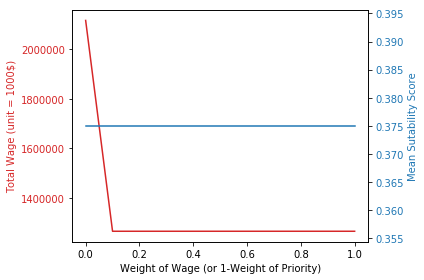

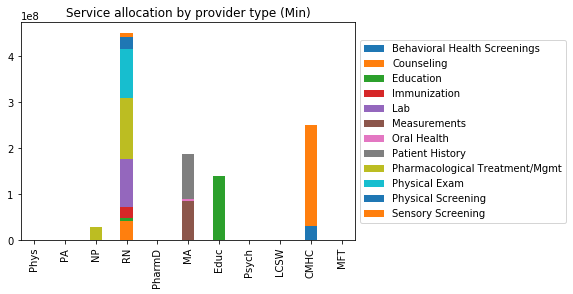

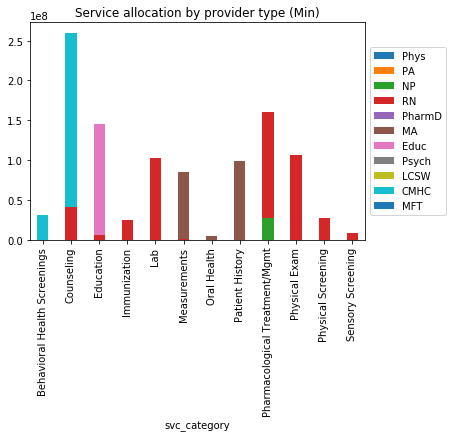

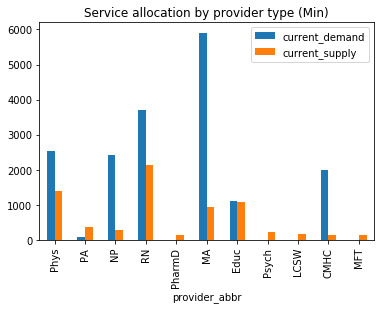

{'total_wage': [2116499058.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0,
  1264833607.0],
 'total_sutab': [0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994,
  0.37499999999999994],
 'FTE':                     0       0       0       0       0       0       0       0  \
 provider_abbr                                                                   
 Phys           9294.0  2537.5  2537.5  2537.5  2537.5  2537.5  2537.5  2537.5   
 PA               84.5    84.5    84.5    84.5    84.5    84.5    84.5    84.5   
 NP             2199.5  2418.0  2418.0  2418.0  2418.0  2418.0  2418.0  2418.0   
 RN               84.5  3703.0  3703.0  3703.0  3703.0  3703.0  3703.0  3703.0   
 PharmD            0.0     0.0     0.0   

In [5]:
option = 'ideal_staffing' ; sub_option = "all_combination"; sub_option_value = .9; #s_weight = 0.1
geo = 'State of Utah'
out =  main(geo, year, current_year, option, sub_option, sub_option_value, sut_target, collapse_group, FTE_time,
        pop_chronic_trend, pop_chronic_prev, chron_care_freq, geo_area, service_characteristics,
        pop_acute_need, population, provider_supply , pop_prev_need , provider_list ,
        encounter_detail, overhead_work)
out